In [1]:
import os
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
from pattern.en import tag
from nltk.corpus import wordnet as wn
import string
SpeakerName = []
SpeakerName = [f for f in sorted(os.listdir("../Project/Data"))]
path = []
for i in SpeakerName:
    path.append('../Project/Data/' + i + "/")
dname = {}
dalltext = {}
for i in range(len(path)):
    articlename = [path[i]+f for f in os.listdir(path[i]) if f.endswith('.txt')]
    dname[SpeakerName[i]] = articlename[1:]
    dalltext[SpeakerName[i]] = articlename[0]

In [2]:
len_sp = []
name_sp = []
for k in dname.keys():
    name_sp.append(k)
    len_sp.append(len(dname[k]))

In [3]:
import matplotlib.pyplot as plt


y = len_sp
N = len(y)
x = name_sp
width = 0.4
plt.title("Number of Files")
plt.rcParams.update({'font.size': 8})
plt.bar(x, y, width, color="skyblue")

<Container object of 5 artists>

In [4]:
# Reference: https://github.com/dipanjanS/text-analytics-with-python/blob/master/Old-First-Edition/source_code/Ch04_Text_Classification/contractions.py
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [5]:

stopword_list = nltk.corpus.stopwords.words('english')
stopword_list = stopword_list + ['mr', 'mrs', 'come', 'go', 'get', 'tell',
'listen', 'one', 'two', 'three', 'four', 'five',
'six', 'seven', 'eight',
'nine', 'zero', 'join', 'find', 'make', 'say', 'ask',
'tell', 'see', 'try', 'back', 'also']

In [6]:
# reference: https://github.com/dipanjanS/text-analytics-with-python/blob/master/Old-First-Edition/source_code/Ch04_Text_Classification/normalization.py

def tokenize_text(text):
    tokens = nltk.word_tokenize(text) 
    tokens = [token.strip() for token in tokens]
    return tokens

def normalize_corpus(corpus, tokenize=False):
    normalized_corpus = []    
    for text in corpus:
        text = expand_contractions(text, CONTRACTION_MAP)
        text = lemmatize_text(text)
        text = remove_special_characters(text)
        text = remove_stopwords(text)
        normalized_corpus.append(text)
        if tokenize:
            text = tokenize_text(text)
            normalized_corpus.append(text)
            
    return normalized_corpus

def expand_contractions(text, contraction_mapping):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def lemmatize_text(text):
    
    pos_tagged_text = pos_tag_text(text)
    lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag
                         else word                     
                         for word, pos_tag in pos_tagged_text]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

def pos_tag_text(text):
    
    def penn_to_wn_tags(pos_tag):
        if pos_tag.startswith('J'):
            return wn.ADJ
        elif pos_tag.startswith('V'):
            return wn.VERB
        elif pos_tag.startswith('N'):
            return wn.NOUN
        elif pos_tag.startswith('R'):
            return wn.ADV
        else:
            return None
        
    tagged_text = tag(text)
    tagged_lower_text = [(word.lower(), penn_to_wn_tags(pos_tag))
                         for word, pos_tag in
                         tagged_text]
    return tagged_lower_text

    

def remove_special_characters(text):
    tokens = tokenize_text(text)
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub('', token) for token in tokens])
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
    
    
def remove_stopwords(text):
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


In [7]:
df = pd.DataFrame(columns = ["Speaker","FileName","RawText"])

def read_text(filename):
    f = open(filename,'r',encoding="utf8",errors='ignore')
    r = ""
    message = f.read().splitlines()
    for i in message:
        if i and not i.isspace():
            r += " "+i 
    f.close()
    
    r = expand_contractions(r, CONTRACTION_MAP)

    return r

for k in dname.keys():
    for txtname in dname[k]:
        rawtext = read_text(txtname)
        df = df.append({'Speaker': k, "FileName":txtname, 'RawText': rawtext}, ignore_index=True)
        
df['RawText'] = [entry.lower() for entry in df['RawText']]

def clean_pre_token(x):
    x = x.lower()
    x = re.sub("([\[]).*?([\]])", "\g<1>\g<2>", x)
    x = x.replace("[","").replace("]","")
    x = re.sub(r'[^\w\s]','',x)
    return x

df['pre_Token'] = df['RawText'].apply(clean_pre_token)
df['Token']= [nltk.word_tokenize(entry) for entry in df['pre_Token']]

def no_stopwords(x):
    return [w for w in x if not w in stopword_list]

df["Token"]= df['Token'].apply(no_stopwords)
df = df.drop(columns=['pre_Token'])


df['Cleaned_text'] = df['Token'].map(lambda tokens: ' '.join(tokens))


def get_sent_token(x):
    return nltk.sent_tokenize(x)
df['Sent_Token'] = df['RawText'].apply(get_sent_token)

def final_list(x):
    return normalize_corpus(x, tokenize=True)[1::2]
df["Normalized_list"] = df['Sent_Token'].map(final_list)

In [8]:
df.head()

Speaker                                           FileName  \
0    BUSH  ../Project/Data/BUSH/100th Anniversary of Cuba...   
1    BUSH  ../Project/Data/BUSH/2004 Presidential Electio...   
2    BUSH  ../Project/Data/BUSH/2004 Republican National ...   
3    BUSH  ../Project/Data/BUSH/2008 Republican National ...   
4    BUSH  ../Project/Data/BUSH/911 Address to the Nation...   

                                             RawText  \
0   thank you very much. sientese. voy a hablar e...   
1   thank you all. thank you all for coming. we h...   
2   mr. chairman! mr. chairman, delegates, fellow...   
3   thank you, laura, and good evening. as you kn...   
4   good evening.  today, our fellow citizens, ou...   

                                               Token  \
0  [thank, much, sientese, voy, hablar, en, espan...   
1  [thank, thank, coming, long, night, great, nig...   
2  [chairman, chairman, delegates, fellow, citize...   
3  [thank, laura, good, evening, know, duties, wa...   
4  [good, evening, today, fellow, citizens, way, ...   

                                        Cleaned_text  \
0  thank much sientese voy hablar en espanol hoy ...   
1  thank thank coming long night great night vote...   
2  chairman chairman delegates fellow citizens ho...   
3  thank laura good evening know duties washingto...   
4  good evening today fellow citizens way life fr...   

                                          Sent_Token  \
0  [ thank you very much., sientese., voy a habla...   
1  [ thank you all., thank you all for coming., w...   
2  [ mr. chairman!, mr. chairman, delegates, fell...   
3  [ thank you, laura, and good evening., as you ...   
4  [ good evening., today, our fellow citizens, o...   

                                     Normalized_list  
0  [[thank, much], [sientese], [voy, hablar, en, ...  
1  [[thank], [thank], [long, night, great, night]...  
2  [[chairman], [chairman, delegate, fellow, citi...  
3  [[thank, laura, good, evening], [know, duty, w...  
4  [[good, evening], [today, fellow, citizen, way...

In [9]:
df.to_csv("mydata.csv")

### Divide to Two Parties

In [10]:
def remove_punctuation(l):
    r = []
    not_wanted = ["‘","’",'”','“','–']
    for i in l:
        removed = [x for x in i if x not in not_wanted]
        r.append(removed)
    return r

# Topic modeling for two parties using LSI
Rep = ["TRUMP","BUSH",]
Dem = ["HILLARY","OBAMA","SANDERS"]

Rep_df = df.loc[df['Speaker'].isin(Rep)]
Dem_df = df.loc[df['Speaker'].isin(Dem)]

In [11]:
dic_party_num = {}
dic_party_num["Republican"] = Rep_df.shape[0]
dic_party_num["Democratic"] = Dem_df.shape[0]

## Visualization

### 1. Number of Texts

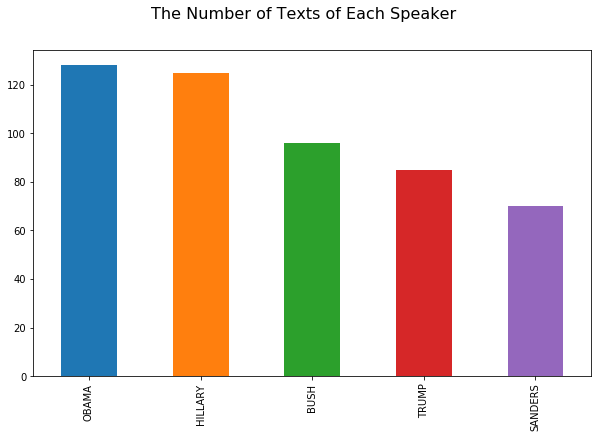

In [12]:
import matplotlib.pyplot as plt
% matplotlib inline
fig = plt.figure(figsize=(10,6))
fig.suptitle('The Number of Texts of Each Speaker', fontsize=16)
pd.value_counts(df['Speaker']).plot.bar()

### 2. Number of Tokens

In [14]:
# count tokens of each speaker
from functools import reduce
dtoken = {}
for i in name_sp:
    df1 = df.loc[df['Speaker'] == i]
    
    dtoken[i] = len(reduce(lambda x,y: x+y, df1['Token'].tolist()))

In [15]:
dtoken

{'BUSH': 104754,
 'HILLARY': 140999,
 'OBAMA': 117985,
 'SANDERS': 67971,
 'TRUMP': 149461}

In [16]:
alltoken = 0
for i in dtoken.values():
    alltoken+=i
print("We have", alltoken, "tokens in total")

We have 581170 tokens in total


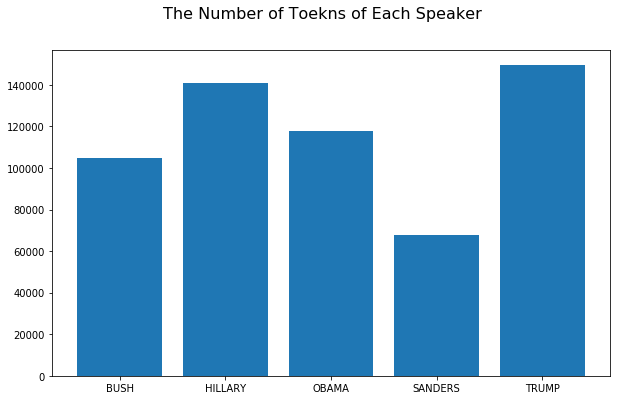

In [17]:

fig = plt.figure(figsize=(10,6))
fig.suptitle('The Number of Toekns of Each Speaker', fontsize=16)
plt.bar(range(len(dtoken)), list(dtoken.values()), align='center')
plt.xticks(range(len(dtoken)), list(dtoken.keys()))

plt.show()

### 3. Party

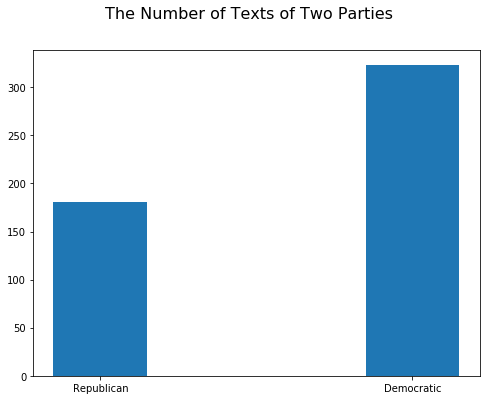

In [18]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('The Number of Texts of Two Parties', fontsize=16)
plt.bar(range(len(dic_party_num)), dic_party_num.values(), align='center',width=0.3)
plt.xticks(range(len(dic_party_num)), list(dic_party_num.keys()))

plt.show()

In [21]:
dic_party_num["Republican"]

181

In [22]:
dic_party_num["Democratic"]

323

### 3. Wordcloud

In [144]:
import warnings
warnings.filterwarnings("ignore")
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [145]:
text = " ".join(i for i in Dem_df.Cleaned_text)
print ("There are {} words in the combination of all text data.".format(len(text)))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
# wordcloud.to_file("img/first_review.png")

There are 2345470 words in the combination of all text data.


There are 1777459 words in the combination of all Republican text data.


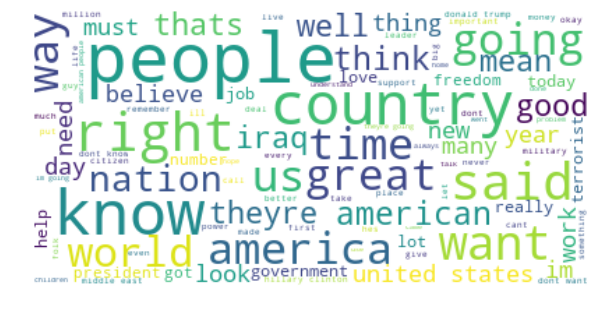

In [146]:
text = " ".join(i for i in Rep_df.Cleaned_text)
print ("There are {} words in the combination of all Republican text data.".format(len(text)))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
# wordcloud.to_file("img/first_review.png")